In [7]:
pip install --upgrade patsy

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [26]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [37]:

df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [38]:
df.drop([105,106],axis=0,inplace=True)

In [39]:
df.columns=['Month','Sales per month']

In [40]:
df.head()

,Month,Sales per month
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [41]:
df.head()

,Month,Sales per month
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


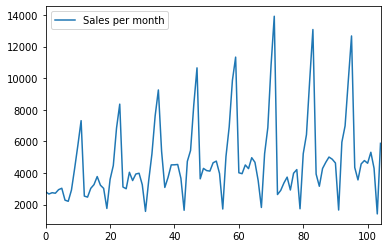

In [42]:
df.plot()

In [43]:
df['Month']=pd.to_datetime(df['Month'])

In [44]:
df.set_index('Month',inplace=True)

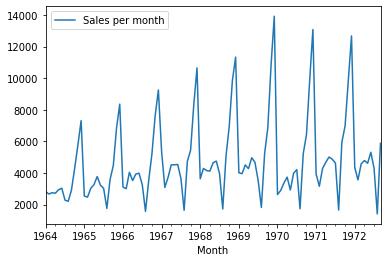

In [45]:
df.plot()

In [46]:
model = sm.tsa.statespace.SARIMAX(df['Sales per month'],order=(1,0,0),seasonal_order=(1,1,1,12))
results = model.fit()

C:\Users\vinay.nanjappa\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\vinay.nanjappa\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


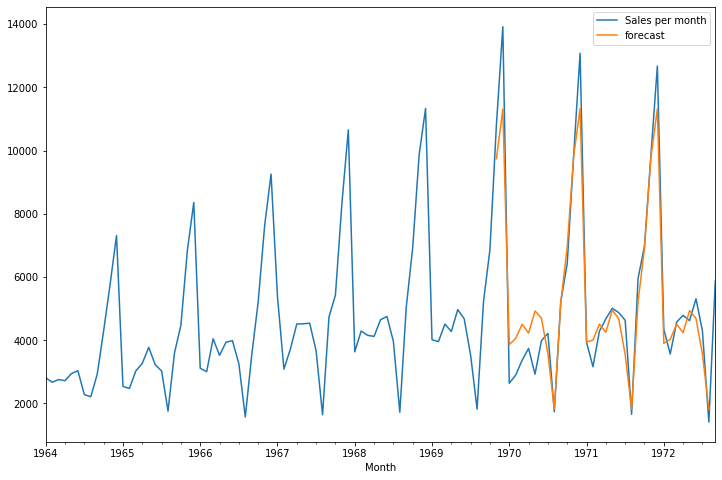

In [47]:
df['forecast']=results.predict(start=70,end=103,dynamic=True)
df[['Sales per month','forecast']].plot(figsize=(12,8))

In [48]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1]+ DateOffset(months=x) for x in range(0,24)]

In [49]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [50]:
future_df=pd.concat([df,future_datest_df])

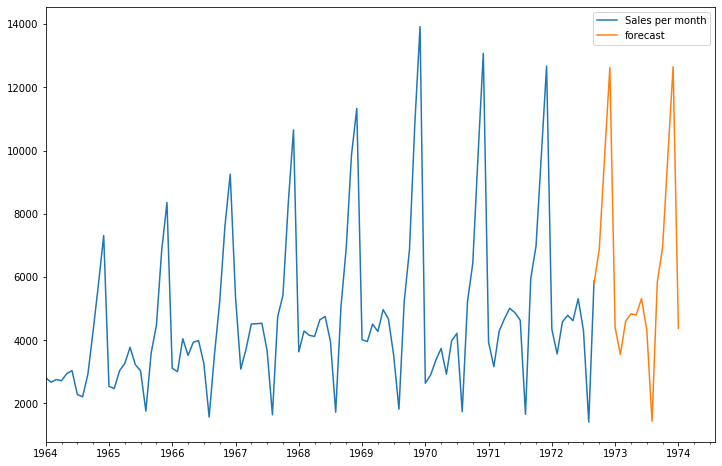

In [51]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales per month', 'forecast']].plot(figsize=(12, 8))